# Imports

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random 
import json

In [3]:
MATRIX_SIDE = 10 
NO_FG_NODES = 20
COLOR_BG = "#a8dadc" 
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800 
SIZE_FG_NODES = 2400 
EDGE_BG_WEIGHT = 4 
EDGE_FG_WEIGHT = 24 
FIG_SIZE = (12, 12)

# Activity 2
## 2.1 Sub-activity: Graph creation
### Task 1

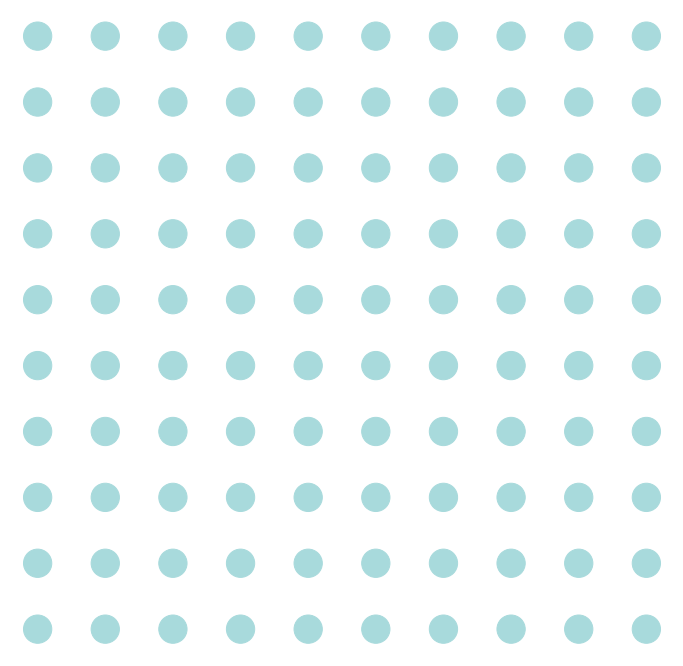

In [4]:
plt.figure(figsize=FIG_SIZE)
masterpiece=nx.Graph()
for i in range(MATRIX_SIDE):
    for j in range(MATRIX_SIDE):
        name = str(i)+"-"+str(j)
        attributes = {"color":COLOR_BG, "size":SIZE_BG_NODES, "node_type":"bg"}
        masterpiece.add_nodes_from([(name, attributes)])

masterpiece.nodes()
# # Nested Loop 
pos = {}
for i in range(MATRIX_SIDE):
    for j in range(MATRIX_SIDE):
        pos[str(i)+"-"+str(j)] = [i,j]


# Remove the edges.
# masterpiece.remove_edges_from(list(masterpiece.edges()))

# Get the node colors, store them in an array 
bg_node_colors = [dict(masterpiece.nodes(data=True))[node]["color"] for node in dict(masterpiece.nodes(data=True)).keys()]

# Get the node size
bg_node_sizes = [dict(masterpiece.nodes(data=True))[node]["size"] for node in dict(masterpiece.nodes(data=True)).keys()]
# Draw the masterpiece, with pos indicating the nodes positions, 
# node_color, a list, indicating the color of each node, and node size indicating each node size
nx.draw_networkx(masterpiece, pos=pos,with_labels = False, node_color=bg_node_colors, node_size = bg_node_sizes)
plt.axis('off')
plt.show()



### Task 2

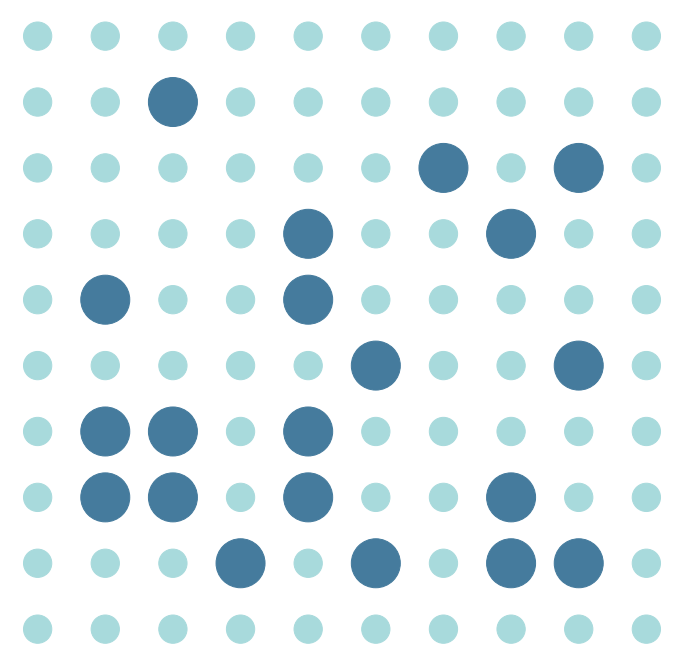

In [5]:
plt.figure(figsize=FIG_SIZE)
FG_NODES_LIST = []
# Choose randomly a list of NO FG NODES background nodes

while len(FG_NODES_LIST) != NO_FG_NODES:
    # Aviod the borders, since the border indexes are 0 and 9
    row_index = random.randint(1,8)
    col_index = random.randint(1,8)
    if (row_index, col_index) not in FG_NODES_LIST:
        FG_NODES_LIST.append((row_index, col_index))

# Change the color and size value in specific position, foreground points.
for node in FG_NODES_LIST:
    index = node[0] * MATRIX_SIDE + node[1] # 2D index converted to 1D. 
    # Change its data.
    masterpiece.nodes[str(node[0])+"-"+str(node[1])]["size"] = SIZE_FG_NODES
    masterpiece.nodes[str(node[0])+"-"+str(node[1])]["color"] = COLOR_FG
    masterpiece.nodes[str(node[0])+"-"+str(node[1])]["node_type"] = "fg"
    bg_node_colors[index] = COLOR_FG
    bg_node_sizes[index] = SIZE_FG_NODES

nx.draw_networkx(masterpiece, pos=pos,with_labels = False, node_color=bg_node_colors, node_size = bg_node_sizes)
plt.axis('off')
plt.show()


### Task 3 

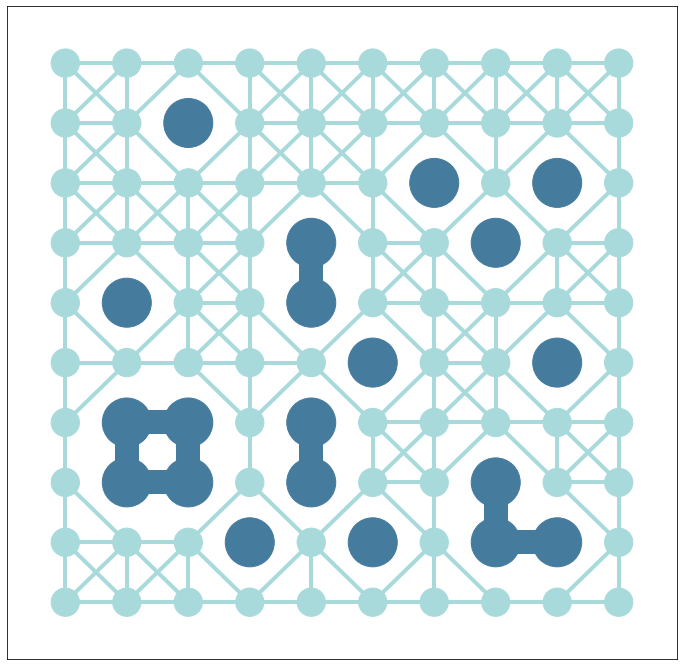

In [6]:
plt.figure(figsize=FIG_SIZE)
# Get the background nodes list
nodes_list = dict(masterpiece.nodes(data=True))
back_ground_nodes = []
fore_ground_nodes = []
for node, value in nodes_list.items():
    if value["node_type"] == "bg":
        back_ground_nodes.append(node)
    elif value["node_type"] == "fg":
        fore_ground_nodes.append(node)

# Add the line of background nodes
for node in back_ground_nodes:
    # the one up the node
    node_pos = node.split("-")
    node_pos_x = int(node_pos[0])
    node_pos_y = int(node_pos[1])
    up_node = str(node_pos_x) + "-" + str(node_pos_y+1)
    # the one on the right side of the node
    right_node = str(node_pos_x+1) + "-" + str(node_pos_y)
    # the diagnoal neighbours
    up_right_node = str(node_pos_x+1) + "-" + str(node_pos_y+1)
    up_left_node = str(node_pos_x-1) + "-" + str(node_pos_y+1)
    # judge whether the node is background or not
    if up_node in back_ground_nodes:
        masterpiece.add_edge(node, up_node, weight = EDGE_BG_WEIGHT, color = COLOR_BG)
    if right_node in back_ground_nodes:
        masterpiece.add_edge(node, right_node, weight = EDGE_BG_WEIGHT, color = COLOR_BG)
    if up_right_node in back_ground_nodes:
        masterpiece.add_edge(node, up_right_node, weight = EDGE_BG_WEIGHT, color = COLOR_BG)
    if up_left_node in back_ground_nodes:
        masterpiece.add_edge(node, up_left_node, weight = EDGE_BG_WEIGHT, color = COLOR_BG)
        

# Add the line of foreground nodes
for node in fore_ground_nodes:
    node_pos = node.split("-")
    node_pos_x = int(node_pos[0])
    node_pos_y = int(node_pos[1])
    # the one up the node
    up_node = str(node_pos_x) + "-" + str(node_pos_y+1)
    # the one on the right side of the node
    right_node = str(node_pos_x+1) + "-" + str(node_pos_y)
    if up_node in fore_ground_nodes:
        masterpiece.add_edge(node, up_node, weight = EDGE_FG_WEIGHT, color = COLOR_FG)
    if right_node in fore_ground_nodes:
        masterpiece.add_edge(node, right_node, weight = EDGE_FG_WEIGHT, color = COLOR_FG)

edge_weight_list = [item[2]["weight"] for item in masterpiece.edges(data=True)]

edge_color_list = [item[2]["color"] for item in masterpiece.edges(data=True)]
nx.draw_networkx(masterpiece, pos=pos, with_labels = False, node_color=bg_node_colors, node_size = bg_node_sizes, edge_color = edge_color_list, width = edge_weight_list)


## 2.2 Sub-activity: Graph manipulation and output
### Task 4
### Average degree.

In [14]:
# print out the graph info

print("The Graph info is as follows.\n")
print(nx.info(masterpiece))
print("\nThe graph density is {}\n".format(str(nx.density(masterpiece))))

print("The Graph Degree Centrality is as follows.")
nx.algorithms.centrality.degree_centrality(masterpiece)


The Graph info is as follows.

Graph with 100 nodes and 208 edges

The graph density is 0.04202020202020202

The Graph Degree Centrality is as follows.


{'0-0': 0.030303030303030304,
 '0-1': 0.04040404040404041,
 '0-2': 0.030303030303030304,
 '0-3': 0.030303030303030304,
 '0-4': 0.030303030303030304,
 '0-5': 0.04040404040404041,
 '0-6': 0.04040404040404041,
 '0-7': 0.05050505050505051,
 '0-8': 0.05050505050505051,
 '0-9': 0.030303030303030304,
 '1-0': 0.05050505050505051,
 '1-1': 0.06060606060606061,
 '1-2': 0.020202020202020204,
 '1-3': 0.020202020202020204,
 '1-4': 0.05050505050505051,
 '1-5': 0.0,
 '1-6': 0.07070707070707072,
 '1-7': 0.07070707070707072,
 '1-8': 0.07070707070707072,
 '1-9': 0.04040404040404041,
 '2-0': 0.04040404040404041,
 '2-1': 0.05050505050505051,
 '2-2': 0.020202020202020204,
 '2-3': 0.020202020202020204,
 '2-4': 0.05050505050505051,
 '2-5': 0.07070707070707072,
 '2-6': 0.07070707070707072,
 '2-7': 0.07070707070707072,
 '2-8': 0.0,
 '2-9': 0.04040404040404041,
 '3-0': 0.04040404040404041,
 '3-1': 0.0,
 '3-2': 0.030303030303030304,
 '3-3': 0.04040404040404041,
 '3-4': 0.05050505050505051,
 '3-5': 0.0606060606060

### Task 5

In [8]:
# Get masterpiece data
masterpiece_dict_data = nx.readwrite.json_graph.node_link_data(masterpiece)
# dump into json
mp_json = json.dumps(masterpiece_dict_data, indent=4)
# Write the data into a json file.
with open("masterpiece_data", "w") as file:
    file.write(mp_json)
print("Sucessfully saved")

Sucessfully saved
